# <b>Price Predictor

### First we'll do a year of one company:

In [195]:
import numpy as np
import pandas as pd
import matplotlib
import yfinance as yf

In [196]:
data = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector


remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

print(len(symbols))

symbol_industry = dict(zip(symbols,industries))
print(len(symbol_industry))

499
499


In [197]:
tickers = yf.Tickers('AAPL')

APPLdf = tickers.tickers['AAPL'].history(period="5d", start="2022-01-01", end="2022-12-31")
APPLdf.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-01-03 00:00:00-05:00,175.821130,180.814085,175.702491,179.953903,104487900,0.0,0.0
2022-01-04 00:00:00-05:00,180.566891,180.873387,177.096533,177.669983,99310400,0.0,0.0
2022-01-05 00:00:00-05:00,177.581022,178.134693,172.667164,172.944000,94537600,0.0,0.0
2022-01-06 00:00:00-05:00,170.749050,173.319685,169.701027,170.056961,96904000,0.0,0.0
2022-01-07 00:00:00-05:00,170.936919,172.172799,169.097931,170.225052,86709100,0.0,0.0
2022-01-10 00:00:00-05:00,167.169959,170.551323,166.270236,170.244827,106765600,0.0,0.0
2022-01-11 00:00:00-05:00,170.373387,173.201065,168.890332,173.102203,76138300,0.0,0.0
2022-01-12 00:00:00-05:00,174.130435,175.178458,172.845133,173.547104,74805200,0.0,0.0
2022-01-13 00:00:00-05:00,173.794269,174.624776,169.849337,170.244827,84505800,0.0,0.0


In [198]:
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [199]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(go.Ohlc(x=APPLdf.index,
                      open=APPLdf.Open,
                      high=APPLdf.High,
                      low=APPLdf.Low,
                      close=APPLdf.Close,
                      name='Price'), row=1, col=1)

fig.add_trace(go.Scatter(x=APPLdf.index, y=APPLdf.Volume, name='Volume'), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [200]:
drop_cols = ['Open', 'Low', 'High','Volume', 'Dividends', 'Stock Splits']
APPLdf = APPLdf.drop(columns=drop_cols, axis = 1)
APPLdf.index = APPLdf.index.astype(str).str.split(' ').str[0]
APPLdf

,Close
Date,
2022-01-03,179.953903
2022-01-04,177.669983
2022-01-05,172.944000
2022-01-06,170.056961
2022-01-07,170.225052
...,...
2022-12-23,131.127075
2022-12-27,129.307236
2022-12-28,125.339409


In [201]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('Price',))

# Add trace for Close price
fig.add_trace(go.Scatter(x=APPLdf.index, y=APPLdf['Close'], name='Close Price'), row=1, col=1)

# Update layout
fig.update(layout_xaxis_rangeslider_visible=False)

# Show figure
fig.show()

In [202]:
APPLdf.loc["2022-06-15"]

Close    134.267654
Name: 2022-06-15, dtype: float64

In [203]:
APPLdf.loc["2022-11-25"]
#APPL.loc["2022-11-24"]

Close    147.286743
Name: 2022-11-25, dtype: float64

In [204]:
holidays = ["2022-01-17","2022-02-21","2022-04-15", "2022-05-30", "2022-06-20", "2022-07-4", "2022-09-5", "2022-11-24","2022-12-26"]
len(holidays)

9

In [205]:
holiday_df = pd.DataFrame(index=holidays)
holiday_df['Date'] = holiday_df.index

# Add another column 'Close' with NaN values
holiday_df['Close'] = float('nan')

# Set the 'Date' column as the index
holiday_df.set_index('Date', inplace=True)

# Print the resulting DataFrame
holiday_df

,Close
Date,
2022-01-17,NaN
2022-02-21,NaN
2022-04-15,NaN
2022-05-30,NaN
2022-06-20,NaN
2022-07-4,NaN
2022-09-5,NaN
2022-11-24,NaN
2022-12-26,NaN


## <b>APPL Stock df with holdiays </b>

In [206]:
# Concatenate the original DataFrame with the holiday DataFrame
frames = [APPLdf, holiday_df]
result_df = pd.concat(frames)

# Sort the index to maintain order
result_df = result_df.sort_index()

# Print the resulting DataFrame
APPL1 = result_df
APPL1
#APPL1 has NaN values
#APPLdf has no NaN values

,Close
Date,
2022-01-03,179.953903
2022-01-04,177.669983
2022-01-05,172.944000
2022-01-06,170.056961
2022-01-07,170.225052
...,...
2022-12-26,NaN
2022-12-27,129.307236
2022-12-28,125.339409


In [207]:
APPLPCT1 = APPL1.pct_change()
APPLPCT1

,Close
Date,
2022-01-03,NaN
2022-01-04,-0.012692
2022-01-05,-0.026600
2022-01-06,-0.016693
2022-01-07,0.000988
...,...
2022-12-26,0.000000
2022-12-27,-0.013878
2022-12-28,-0.030685


In [208]:
#print(APPLPCT.isna())
d = APPLPCT1[APPLPCT1['Close'].isna()]
d

,Close
Date,
2022-01-03,NaN


In [209]:
APPLPCT1.head(10)

,Close
Date,
2022-01-03,NaN
2022-01-04,-0.012692
2022-01-05,-0.026600
2022-01-06,-0.016693
2022-01-07,0.000988
2022-01-10,0.000116
2022-01-11,0.016784
2022-01-12,0.002570
2022-01-13,-0.019028


## <b>APPL data for the year:

In [210]:
# Convert index to datetime if it's in string format
APPL1.index = pd.to_datetime(APPL1.index)

# Create a new DataFrame with the desired structure
new_df = pd.DataFrame(index=[f'APPL Week {week}' for week in range(1, 53)],
                      columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

# Iterate through rows of the original DataFrame and fill the new DataFrame
for i, row in APPL1.iterrows():
    week = i.week
    day = i.dayofweek
    
    # If there are rows for the current week and day, set the mean close price
    if not pd.isna(row['Close']):
        new_df.at[f'APPL Week {week}', f'Day {day + 1}'] = row['Close']

# Display the new DataFrame
APPL = new_df
APPL


,Day 1,Day 2,Day 3,Day 4,Day 5
APPL Week 1,179.953903,177.669983,172.944,170.056961,170.225052
APPL Week 2,170.244827,173.102203,173.547104,170.244827,171.114883
APPL Week 3,NaN,167.881821,164.352158,162.651581,160.575333
APPL Week 4,159.79422,157.975021,157.886032,157.421341,168.405838
APPL Week 5,172.805557,172.637512,173.853607,170.946808,170.659714
APPL Week 6,169.937042,173.075241,174.510696,170.39241,166.947357
APPL Week 7,167.184967,171.05571,170.81813,167.184967,165.620819
APPL Week 8,NaN,162.670731,158.463379,161.106598,163.195404
APPL Week 9,163.462677,161.561951,164.888229,164.561554,161.532257
APPL Week 10,157.701111,155.859772,161.314453,156.92894,153.176987


In [211]:
# Convert index to datetime if it's in string format
APPLPCT1.index = pd.to_datetime(APPL1.index)

# Create a new DataFrame with the desired structure
new_df = pd.DataFrame(index=[f'APPL PC Week {week}' for week in range(1, 53)], columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

# Iterate through rows of the original DataFrame and fill the new DataFrame
for i, row in APPLPCT1.iterrows():
    week = i.week
    day = i.dayofweek
    
    # If there are rows for the current week and day, set the mean close price
    if not pd.isna(row['Close']):
        new_df.at[f'APPL PC Week {week}', f'Day {day + 1}'] = row['Close']

# Display the new DataFrame
APPLPCT = new_df
APPLPCT

,Day 1,Day 2,Day 3,Day 4,Day 5
APPL PC Week 1,NaN,-0.012692,-0.0266,-0.016693,0.000988
APPL PC Week 2,0.000116,0.016784,0.00257,-0.019028,0.005111
APPL PC Week 3,0.0,-0.018894,-0.021025,-0.010347,-0.012765
APPL PC Week 4,-0.004864,-0.011385,-0.000563,-0.002943,0.069778
APPL PC Week 5,0.026126,-0.000972,0.007044,-0.01672,-0.001679
APPL PC Week 6,-0.004235,0.018467,0.008294,-0.023599,-0.020218
APPL PC Week 7,0.001423,0.023152,-0.001389,-0.021269,-0.009356
APPL PC Week 8,0.0,-0.017812,-0.025864,0.01668,0.012965
APPL PC Week 9,0.001638,-0.011628,0.020588,-0.001981,-0.018408
APPL PC Week 10,-0.023718,-0.011676,0.034997,-0.027186,-0.023909


In [212]:
APPL1.head(20)

,Close
Date,
2022-01-03,179.953903
2022-01-04,177.669983
2022-01-05,172.944000
2022-01-06,170.056961
2022-01-07,170.225052
2022-01-10,170.244827
2022-01-11,173.102203
2022-01-12,173.547104
2022-01-13,170.244827


## <b>Week 1 of all the stocks

In [213]:
#symbols = list of stocks
# Create an empty DataFrame to store the results
# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

# Iterate through each symbol
for symbol in symbols:
    # Fetch historical stock data for the symbol
    ticker = yf.Ticker(symbol)
    stock_data = ticker.history(period="5d", start="2022-01-03", end= "2022-01-10")

    # Extract the close prices for the first week
    close_prices = stock_data['Close'].tolist()[:5]

    # Create a temporary DataFrame for the current symbol
    temp_df = pd.DataFrame([close_prices], columns=[f'Day {i+1}' for i in range(len(close_prices))],
                           index=[f'{symbol} Week 1'])

    # Concatenate the temporary DataFrame with the result DataFrame
    result_df = pd.concat([result_df, temp_df])

# Display the resulting DataFrame
print(result_df)


BF.B: Period '5d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']
CEG: Data doesn't exist for startDate = 1641186000, endDate = 1641790800
GEHC: Data doesn't exist for startDate = 1641186000, endDate = 1641790800
KVUE: Data doesn't exist for startDate = 1641186000, endDate = 1641790800
VLTO: Data doesn't exist for startDate = 1641186000, endDate = 1641790800


                  Day 1       Day 2       Day 3       Day 4       Day 5
MMM Week 1   160.789688  163.042221  162.372803  161.024887  162.788925
AOS Week 1    80.547264   81.886993   80.518349   81.058090   80.142464
ABT Week 1   134.063431  130.910492  130.322311  130.303024  130.707993
ABBV Week 1  125.280716  125.040176  125.697014  125.104919  124.781151
ACN Week 1   395.446655  392.620728  385.706360  367.080475  360.039886
...                 ...         ...         ...         ...         ...
YUM Week 1   132.103195  132.809509  131.125946  132.480560  130.961502
ZBRA Week 1  583.900024  587.599976  558.179993  555.159973  530.859985
ZBH Week 1   123.620811  124.874916  124.463272  123.429329  122.682610
ZION Week 1   59.537769   61.233814   61.372837   63.893734   64.959564
ZTS Week 1   230.225372  221.460190  213.039368  213.885376  207.658295

[499 rows x 5 columns]


In [214]:
result_df

,Day 1,Day 2,Day 3,Day 4,Day 5
MMM Week 1,160.789688,163.042221,162.372803,161.024887,162.788925
AOS Week 1,80.547264,81.886993,80.518349,81.058090,80.142464
ABT Week 1,134.063431,130.910492,130.322311,130.303024,130.707993
ABBV Week 1,125.280716,125.040176,125.697014,125.104919,124.781151
ACN Week 1,395.446655,392.620728,385.706360,367.080475,360.039886
...,...,...,...,...,...
YUM Week 1,132.103195,132.809509,131.125946,132.480560,130.961502
ZBRA Week 1,583.900024,587.599976,558.179993,555.159973,530.859985
ZBH Week 1,123.620811,124.874916,124.463272,123.429329,122.682610
ZION Week 1,59.537769,61.233814,61.372837,63.893734,64.959564


In [215]:
result_df.shape

(499, 5)

In [216]:
result_df.loc["CEG Week 1"]

Day 1   NaN
Day 2   NaN
Day 3   NaN
Day 4   NaN
Day 5   NaN
Name: CEG Week 1, dtype: float64

In [217]:
rows_with_nan = result_df[result_df.isna().any(axis=1)].index.tolist()
rows_with_nan

['BF.B Week 1', 'CEG Week 1', 'GEHC Week 1', 'KVUE Week 1', 'VLTO Week 1']

In [218]:
#drop them
temp = result_df.T.drop(columns=rows_with_nan, axis = 1)
week1 = temp.T

In [219]:
week1

,Day 1,Day 2,Day 3,Day 4,Day 5
MMM Week 1,160.789688,163.042221,162.372803,161.024887,162.788925
AOS Week 1,80.547264,81.886993,80.518349,81.058090,80.142464
ABT Week 1,134.063431,130.910492,130.322311,130.303024,130.707993
ABBV Week 1,125.280716,125.040176,125.697014,125.104919,124.781151
ACN Week 1,395.446655,392.620728,385.706360,367.080475,360.039886
...,...,...,...,...,...
YUM Week 1,132.103195,132.809509,131.125946,132.480560,130.961502
ZBRA Week 1,583.900024,587.599976,558.179993,555.159973,530.859985
ZBH Week 1,123.620811,124.874916,124.463272,123.429329,122.682610
ZION Week 1,59.537769,61.233814,61.372837,63.893734,64.959564


In [220]:
week1.isna().any()

Day 1    False
Day 2    False
Day 3    False
Day 4    False
Day 5    False
dtype: bool

In [221]:
numeric_columns = week1.columns

# Apply the percentage change calculation row-wise, starting from 'Day 2'
week1_pct_change = week1[numeric_columns].pct_change(axis=1)

# Display the resulting DataFrame
week1_pct_change

,Day 1,Day 2,Day 3,Day 4,Day 5
MMM Week 1,NaN,0.014009,-0.004106,-0.008301,0.010955
AOS Week 1,NaN,0.016633,-0.016714,0.006703,-0.011296
ABT Week 1,NaN,-0.023518,-0.004493,-0.000148,0.003108
ABBV Week 1,NaN,-0.001920,0.005253,-0.004710,-0.002588
ACN Week 1,NaN,-0.007146,-0.017611,-0.048290,-0.019180
...,...,...,...,...,...
YUM Week 1,NaN,0.005347,-0.012677,0.010331,-0.011466
ZBRA Week 1,NaN,0.006337,-0.050068,-0.005410,-0.043771
ZBH Week 1,NaN,0.010145,-0.003296,-0.008307,-0.006050
ZION Week 1,NaN,0.028487,0.002270,0.041075,0.016681


In [222]:
weekpct = week1.pct_change()
weekpct

,Day 1,Day 2,Day 3,Day 4,Day 5
MMM Week 1,NaN,NaN,NaN,NaN,NaN
AOS Week 1,-0.499052,-0.497756,-0.504114,-0.496611,-0.507691
ABT Week 1,0.664407,0.598673,0.618542,0.607526,0.630946
ABBV Week 1,-0.065512,-0.044842,-0.035491,-0.039892,-0.045344
ACN Week 1,2.156485,2.139957,2.068540,1.934181,1.885371
...,...,...,...,...,...
YUM Week 1,0.155958,0.149940,0.151051,0.164541,0.160463
ZBRA Week 1,3.420030,3.424382,3.256823,3.190501,3.053558
ZBH Week 1,-0.788284,-0.787483,-0.777019,-0.777669,-0.768898
ZION Week 1,-0.518384,-0.509639,-0.506900,-0.482346,-0.470507


In [223]:
all = pd.DataFrame(columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'])

# Iterate through each symbol
for symbol in symbols:
    # Fetch historical stock data for the symbol
    ticker = yf.Ticker(symbol)
    stock_data = ticker.history(period="1y")  # Fetch data for the last 1 year

    # Extract the close prices for each week
    for week in range(1, 53):
        start_date = f"2022-01-01"  # Change the start date as needed
        end_date = f"2022-12-31"    # Change the end date as needed
        week_data = stock_data[start_date:end_date]

        # If data for the current week is missing, create a row with NaN values
        if len(week_data) < 5:
            week_row = pd.DataFrame([[np.nan] * 5], columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'],
                                     index=[f'{symbol} Week {week}'])
        else:
            week_row = pd.DataFrame([week_data['Close'].tolist()[:5]], columns=['Day 1', 'Day 2', 'Day 3', 'Day 4', 'Day 5'],
                                     index=[f'{symbol} Week {week}'])

        # Concatenate the temporary DataFrame with the result DataFrame
        all = pd.concat([all, week_row])

# Display the resulting DataFrame
all

BF.B: No price data found, symbol may be delisted (period=1y)


,Day 1,Day 2,Day 3,Day 4,Day 5
MMM Week 1,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 2,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 3,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 4,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 5,119.901367,119.533600,120.353996,121.268707,120.702904
...,...,...,...,...,...
ZTS Week 48,142.301941,144.323502,145.998215,147.286469,149.109833
ZTS Week 49,142.301941,144.323502,145.998215,147.286469,149.109833
ZTS Week 50,142.301941,144.323502,145.998215,147.286469,149.109833
ZTS Week 51,142.301941,144.323502,145.998215,147.286469,149.109833


In [224]:
naners = all[all.isna().any(axis=1)].index.tolist()
print(naners[::52])
print(len(naners))
#12 stocks

['BF.B Week 1', 'KVUE Week 1', 'VLTO Week 1']
156


In [225]:
#drop them
temp = all.T.drop(columns=naners, axis = 1)
sp500_52weeks = temp.T

In [226]:
sp500_52weeks

,Day 1,Day 2,Day 3,Day 4,Day 5
MMM Week 1,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 2,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 3,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 4,119.901367,119.533600,120.353996,121.268707,120.702904
MMM Week 5,119.901367,119.533600,120.353996,121.268707,120.702904
...,...,...,...,...,...
ZTS Week 48,142.301941,144.323502,145.998215,147.286469,149.109833
ZTS Week 49,142.301941,144.323502,145.998215,147.286469,149.109833
ZTS Week 50,142.301941,144.323502,145.998215,147.286469,149.109833
ZTS Week 51,142.301941,144.323502,145.998215,147.286469,149.109833


In [227]:
sp500_52weeks.isna().any()

Day 1    False
Day 2    False
Day 3    False
Day 4    False
Day 5    False
dtype: bool

In [228]:
sp500_pct = sp500_52weeks.pct_change()
sp500_pct

,Day 1,Day 2,Day 3,Day 4,Day 5
MMM Week 1,NaN,NaN,NaN,NaN,NaN
MMM Week 2,0.0,0.0,0.0,0.0,0.0
MMM Week 3,0.0,0.0,0.0,0.0,0.0
MMM Week 4,0.0,0.0,0.0,0.0,0.0
MMM Week 5,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
ZTS Week 48,0.0,0.0,0.0,0.0,0.0
ZTS Week 49,0.0,0.0,0.0,0.0,0.0
ZTS Week 50,0.0,0.0,0.0,0.0,0.0
ZTS Week 51,0.0,0.0,0.0,0.0,0.0


# <b> <font color = "red"> MODEL CREATION

In [229]:
APPL

,Day 1,Day 2,Day 3,Day 4,Day 5
APPL Week 1,179.953903,177.669983,172.944,170.056961,170.225052
APPL Week 2,170.244827,173.102203,173.547104,170.244827,171.114883
APPL Week 3,NaN,167.881821,164.352158,162.651581,160.575333
APPL Week 4,159.79422,157.975021,157.886032,157.421341,168.405838
APPL Week 5,172.805557,172.637512,173.853607,170.946808,170.659714
APPL Week 6,169.937042,173.075241,174.510696,170.39241,166.947357
APPL Week 7,167.184967,171.05571,170.81813,167.184967,165.620819
APPL Week 8,NaN,162.670731,158.463379,161.106598,163.195404
APPL Week 9,163.462677,161.561951,164.888229,164.561554,161.532257
APPL Week 10,157.701111,155.859772,161.314453,156.92894,153.176987


In [230]:
APPLPCT

,Day 1,Day 2,Day 3,Day 4,Day 5
APPL PC Week 1,NaN,-0.012692,-0.0266,-0.016693,0.000988
APPL PC Week 2,0.000116,0.016784,0.00257,-0.019028,0.005111
APPL PC Week 3,0.0,-0.018894,-0.021025,-0.010347,-0.012765
APPL PC Week 4,-0.004864,-0.011385,-0.000563,-0.002943,0.069778
APPL PC Week 5,0.026126,-0.000972,0.007044,-0.01672,-0.001679
APPL PC Week 6,-0.004235,0.018467,0.008294,-0.023599,-0.020218
APPL PC Week 7,0.001423,0.023152,-0.001389,-0.021269,-0.009356
APPL PC Week 8,0.0,-0.017812,-0.025864,0.01668,0.012965
APPL PC Week 9,0.001638,-0.011628,0.020588,-0.001981,-0.018408
APPL PC Week 10,-0.023718,-0.011676,0.034997,-0.027186,-0.023909


In [231]:
APPLPCT.dtypes

Day 1    object
Day 2    object
Day 3    object
Day 4    object
Day 5    object
dtype: object

In [232]:
for column in APPLPCT.columns:
    APPLPCT[column] = pd.to_numeric(APPLPCT[column], errors='coerce')


In [233]:
APPLPCT.dtypes

Day 1    float64
Day 2    float64
Day 3    float64
Day 4    float64
Day 5    float64
dtype: object

In [234]:
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

In [235]:
y = APPLPCT['Day 5']
X = APPLPCT.drop(columns = 'Day 5', axis=1)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
X_train.head()

,Day 1,Day 2,Day 3,Day 4
APPL PC Week 22,0.000000,-0.005346,-0.000873,0.016811
APPL PC Week 46,-0.009486,0.011870,-0.008331,0.012971
APPL PC Week 52,0.000000,-0.013878,-0.030685,0.028324
APPL PC Week 19,-0.033189,0.016112,-0.051841,-0.026894
APPL PC Week 21,0.040119,-0.019216,0.001140,0.023200


In [237]:
from xgboost import XGBRegressor
model1 = XGBRegressor()

model1.fit(X_train, y_train)

predictions = model1.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print('RMSE', rmse)

RMSE 0.035444477964016285


In [285]:
# Predictions on the training set
y_train_pred = model1.predict(X_train)

# Predictions on the test set
y_test_pred = model1.predict(X_test)


In [301]:
df = pd.concat([X_train, y_train], axis=1)
df


,Day 1,Day 2,Day 3,Day 4,Day 5
APPL PC Week 1,NaN,-0.012692,-0.026600,-0.016693,0.000988
APPL PC Week 10,-0.023718,-0.011676,0.034997,-0.027186,-0.023909
APPL PC Week 11,-0.026562,0.029677,0.029015,0.006454,0.020919
APPL PC Week 12,0.008538,0.020800,0.008234,0.022678,0.003734
APPL PC Week 13,0.005037,0.019134,-0.006650,-0.017776,-0.001718
APPL PC Week 15,-0.025516,0.011523,0.016343,-0.029988,0.000000
APPL PC Week 16,-0.001331,0.014115,-0.001016,-0.004844,-0.027821
APPL PC Week 17,0.006737,-0.037328,-0.001467,0.045155,-0.036605
APPL PC Week 18,0.001966,0.009623,0.041008,-0.055716,0.004727
APPL PC Week 19,-0.033189,0.016112,-0.051841,-0.026894,0.031916


In [303]:
#df2 = pd.concat([y_train_pred, y_test_pred], axis=1)


In [287]:
print(len(y_train), len(y_train_pred), len(y_test), len(y_test_pred))

41 41 11 11


In [238]:
predictions

array([-0.03071142, -0.00840891,  0.06518465, -0.00778139,  0.00667693,
       -0.01584833, -0.00271854,  0.01480663, -0.00466664, -0.00588654,
        0.00024917], dtype=float32)

In [239]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Display the first few rows of the DataFrame
print(comparison_df.head(20))

                   Actual  Predicted
APPL PC Week 41 -0.032240  -0.030711
APPL PC Week 28  0.011450  -0.008409
APPL PC Week 40 -0.036719   0.065185
APPL PC Week 45  0.019269  -0.007781
APPL PC Week 7  -0.009356   0.006677
APPL PC Week 47 -0.019594  -0.015848
APPL PC Week 14 -0.011909  -0.002719
APPL PC Week 9  -0.018408   0.014807
APPL PC Week 50 -0.014579  -0.004667
APPL PC Week 32  0.021426  -0.005887
APPL PC Week 5  -0.001679   0.000249


In [240]:
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {predictions[:5]}')

y_true = [-0.03224011  0.01145002 -0.03671873  0.01926875 -0.00935579]
y_pred = [-0.03071142 -0.00840891  0.06518465 -0.00778139  0.00667693]


In [241]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model1, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [242]:
from numpy import absolute
scores = absolute(scores)
print('Mean MAE: %.3f  STD:(%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.026  STD:(0.009)


In [243]:
APPLPCT.head()

,Day 1,Day 2,Day 3,Day 4,Day 5
APPL PC Week 1,NaN,-0.012692,-0.026600,-0.016693,0.000988
APPL PC Week 2,0.000116,0.016784,0.002570,-0.019028,0.005111
APPL PC Week 3,0.000000,-0.018894,-0.021025,-0.010347,-0.012765
APPL PC Week 4,-0.004864,-0.011385,-0.000563,-0.002943,0.069778
APPL PC Week 5,0.026126,-0.000972,0.007044,-0.016720,-0.001679


In [284]:
y_test.head()

APPL PC Week 14   -0.011909
APPL PC Week 28    0.011450
APPL PC Week 32    0.021426
APPL PC Week 40   -0.036719
APPL PC Week 41   -0.032240
Name: Day 5, dtype: float64

In [ ]:
initial_prices = APPL.iloc[:, -1]

# Cumulatively apply percentage changes to get the predicted prices
predicted_prices = initial_prices * (1 + price_percentage_matrix).cumprod()

# Display the result
print(predicted_prices)

In [283]:
# Assuming y_pred contains your percentage predictions
y_pred = (np.array([-0.00013778, 0.00167409, 0.00495364, -0.00013778, 0.00167409]) * 100)

# Convert percentage changes to multiplicative factors
multiplicative_factors = 1 + y_pred

# Assuming initial_price is the starting price of your time series
initial_price = 179.953903 # Replace with your actual initial price

# Calculate predicted prices
predicted_prices = initial_price * np.cumprod(multiplicative_factors)

print(predicted_prices)

[177.47449812 207.18532638 309.8174784  305.54881318 356.70043445]


In [273]:
select = comparison_df.index
select

Index(['APPL PC Week 41', 'APPL PC Week 28', 'APPL PC Week 40',
       'APPL PC Week 45', 'APPL PC Week 7', 'APPL PC Week 47',
       'APPL PC Week 14', 'APPL PC Week 9', 'APPL PC Week 50',
       'APPL PC Week 32', 'APPL PC Week 5'],
      dtype='object')

In [275]:
selected_rows = [row.replace(' PC ', ' ') for row in select]
selected_rows

['APPL Week 41',
 'APPL Week 28',
 'APPL Week 40',
 'APPL Week 45',
 'APPL Week 7',
 'APPL Week 47',
 'APPL Week 14',
 'APPL Week 9',
 'APPL Week 50',
 'APPL Week 32',
 'APPL Week 5']

In [276]:
day_5_values = APPL.loc[selected_rows, 'Day 5']
day_5_values

APPL Week 41    137.382919
APPL Week 28    148.881149
APPL Week 40    139.080597
APPL Week 45    148.867889
APPL Week 7     165.620819
APPL Week 47    147.286743
APPL Week 14    168.382767
APPL Week 9     161.532257
APPL Week 50    133.762329
APPL Week 32     170.85997
APPL Week 5     170.659714
Name: Day 5, dtype: object

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Display the first few rows of the DataFrame
print(comparison_df.head(20))

In [245]:
predictions *= 100
#predictions
multiplicative_factors = 1 + predictions
multiplicative_factors

array([-2.071142  ,  0.1591093 ,  7.5184646 ,  0.22186124,  1.6676927 ,
       -0.5848335 ,  0.7281463 ,  2.480663  ,  0.5333359 ,  0.41134632,
        1.0249169 ], dtype=float32)

In [246]:
# Assuming initial_price is the last known price in your original dataframe
initial_price = APPL['Day 1'].iloc[-1]

# Calculate predicted prices
predicted_prices = initial_price * np.cumprod(multiplicative_factors)

In [247]:
initial_price = APPL1['Close'].iloc[-1]
initial_price

129.20777893066406

In [248]:
y_test = y_test.sort_index()
y_train = y_train.sort_index()
X_train = X_train.sort_index()
X_test = X_test.sort_index()

In [249]:
y_pred = pd.Series(model1.predict(X_train), index=y_train.index)
y_fore = pd.Series(model1.predict(X_test), index=y_test.index)

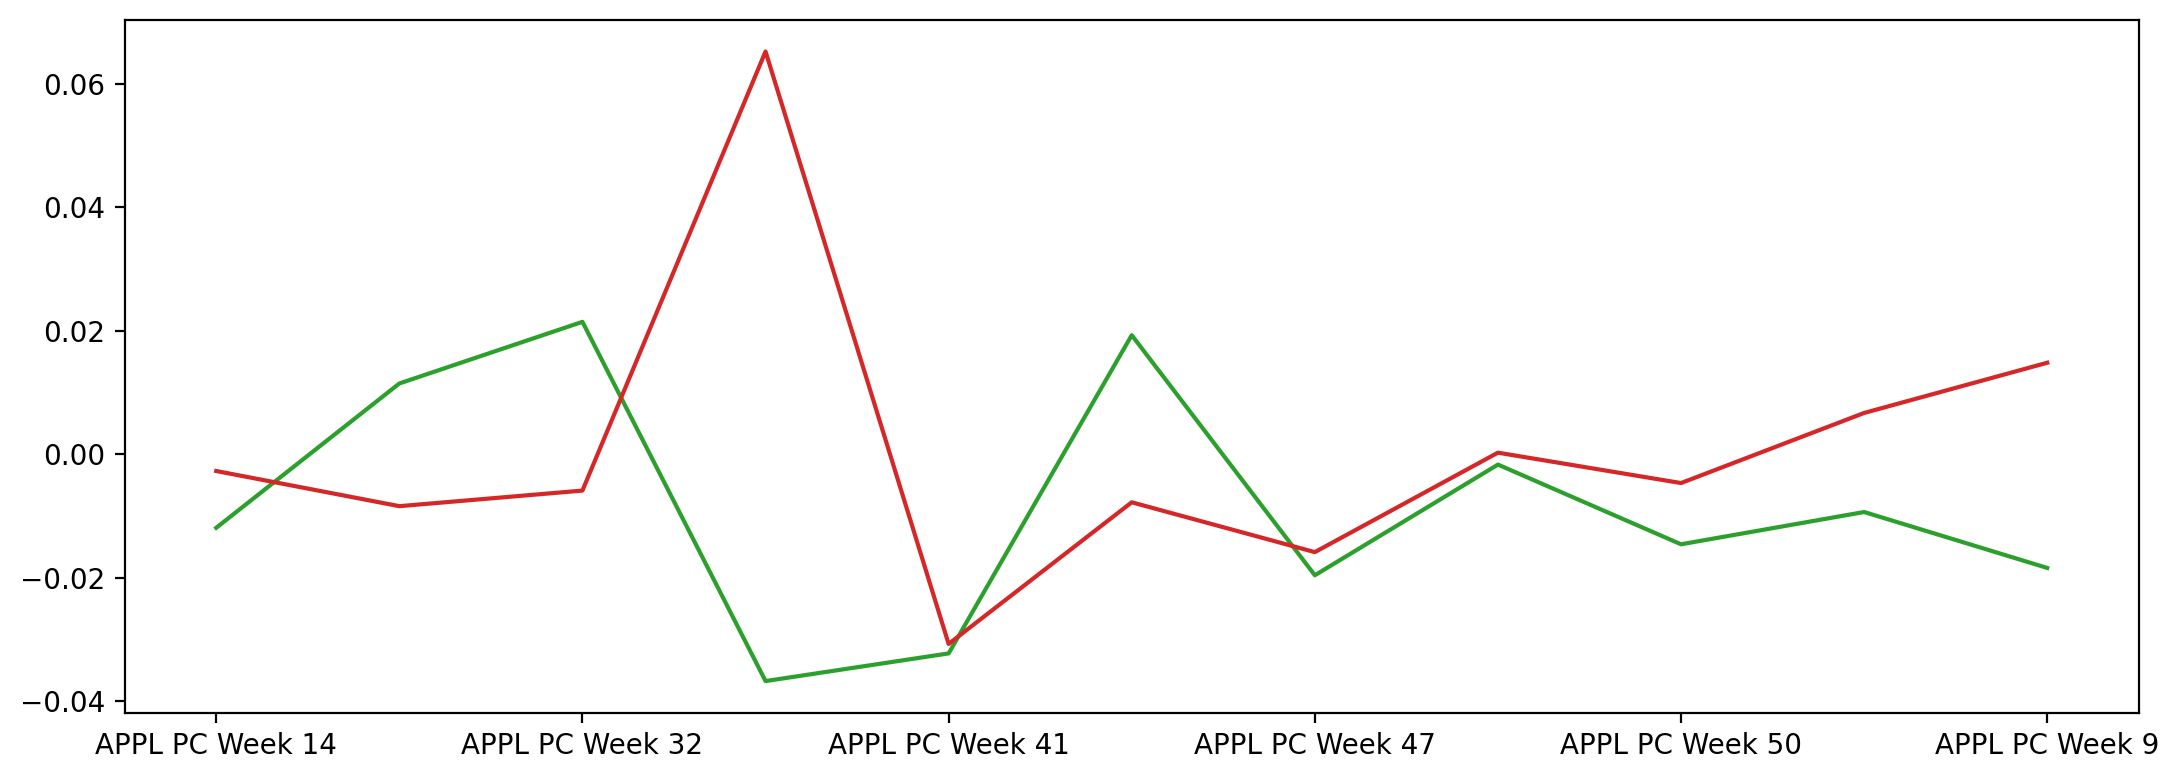

In [250]:
import matplotlib.pyplot as plt
#plot the y_test
ax = y_test.plot(color = 'C2')
#plot predictions from X_test
_ = y_fore.plot(ax=ax, color='C3')

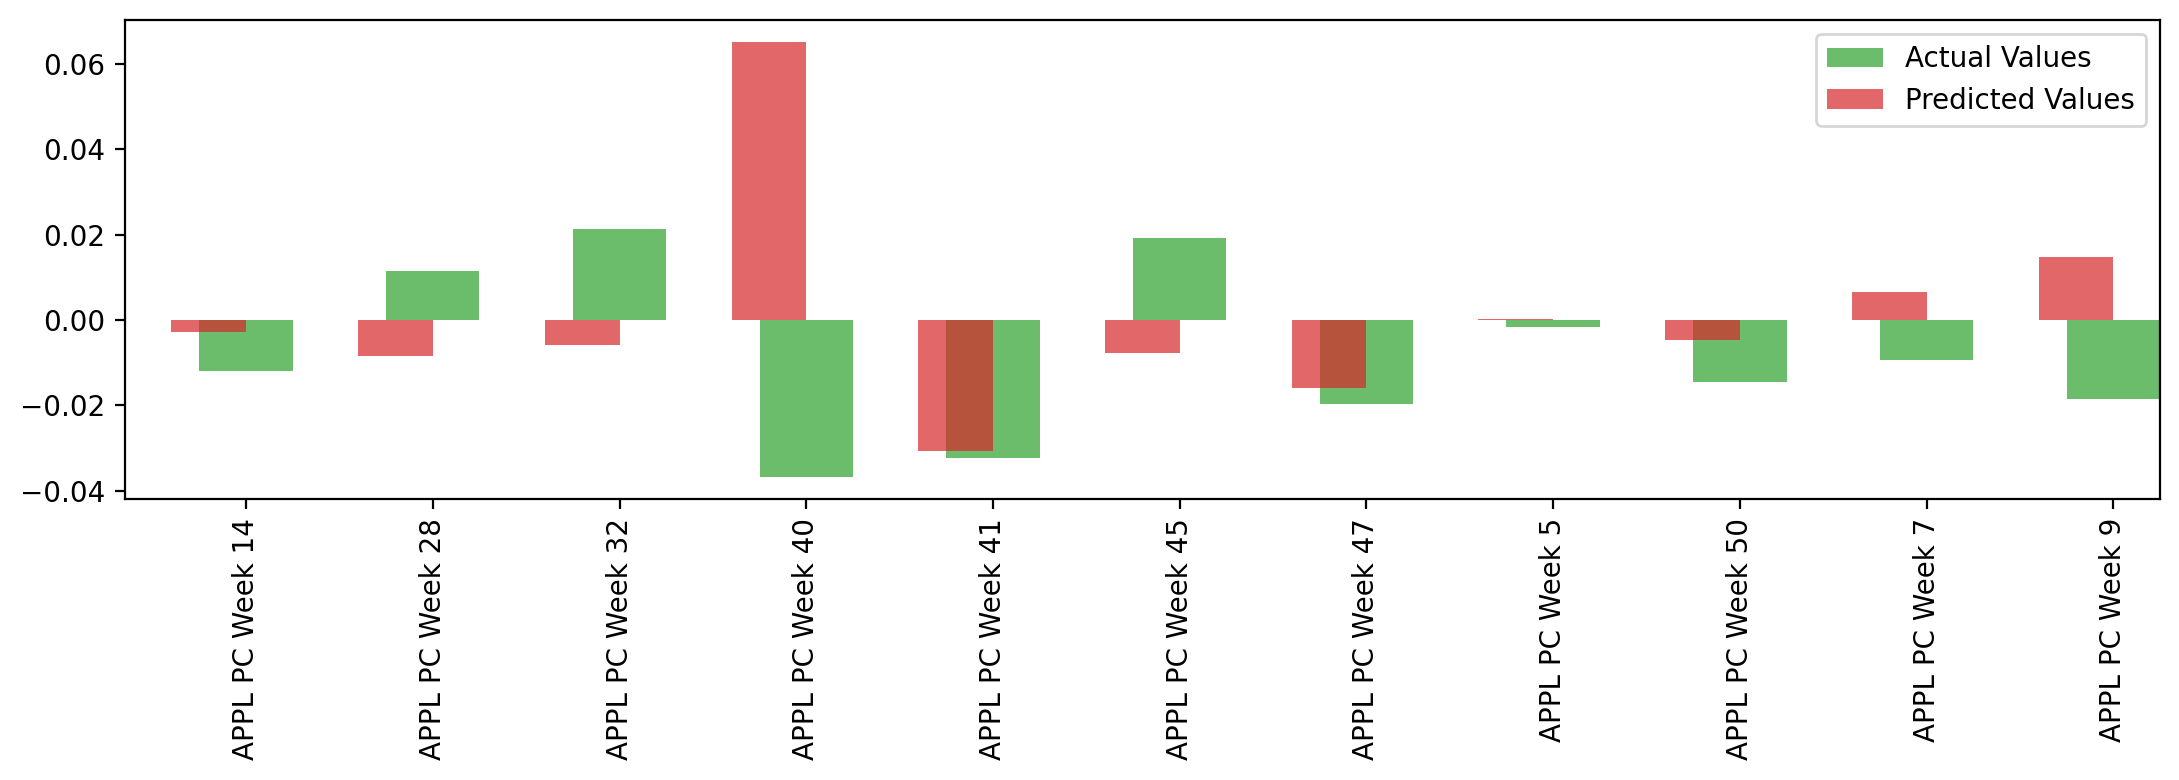

In [251]:
ax = y_test.plot(kind='bar', color='C2', alpha=0.7, label='Actual Values')

# Plot y_fore as bars, slightly offset for visibility
_ = y_fore.plot(kind='bar', color='C3', alpha=0.7, width=0.4, position=1, label='Predicted Values')

# Display the legend
plt.legend()

# Show the plot
plt.show()

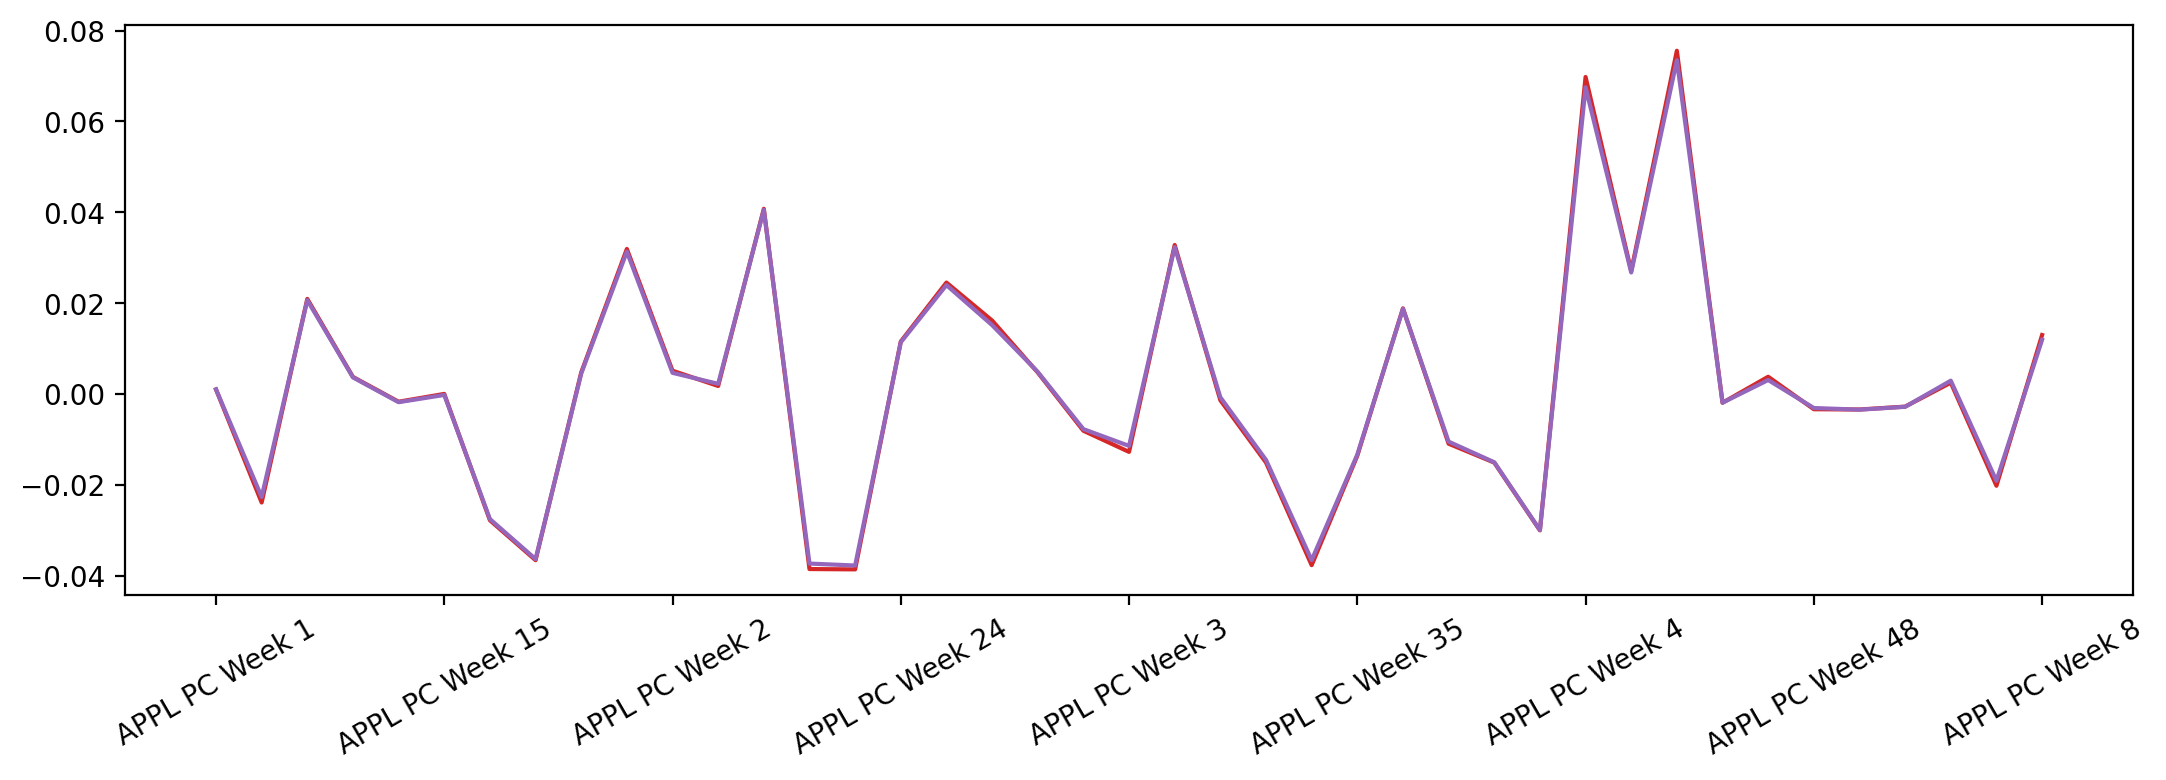

In [252]:
import matplotlib.pyplot as plt
# y_train
ax = y_train.plot(color = 'C3')
# predictions from x_train
ax = y_pred.plot(ax=ax, color = 'C4')
plt.xticks(rotation=30)
plt.show()

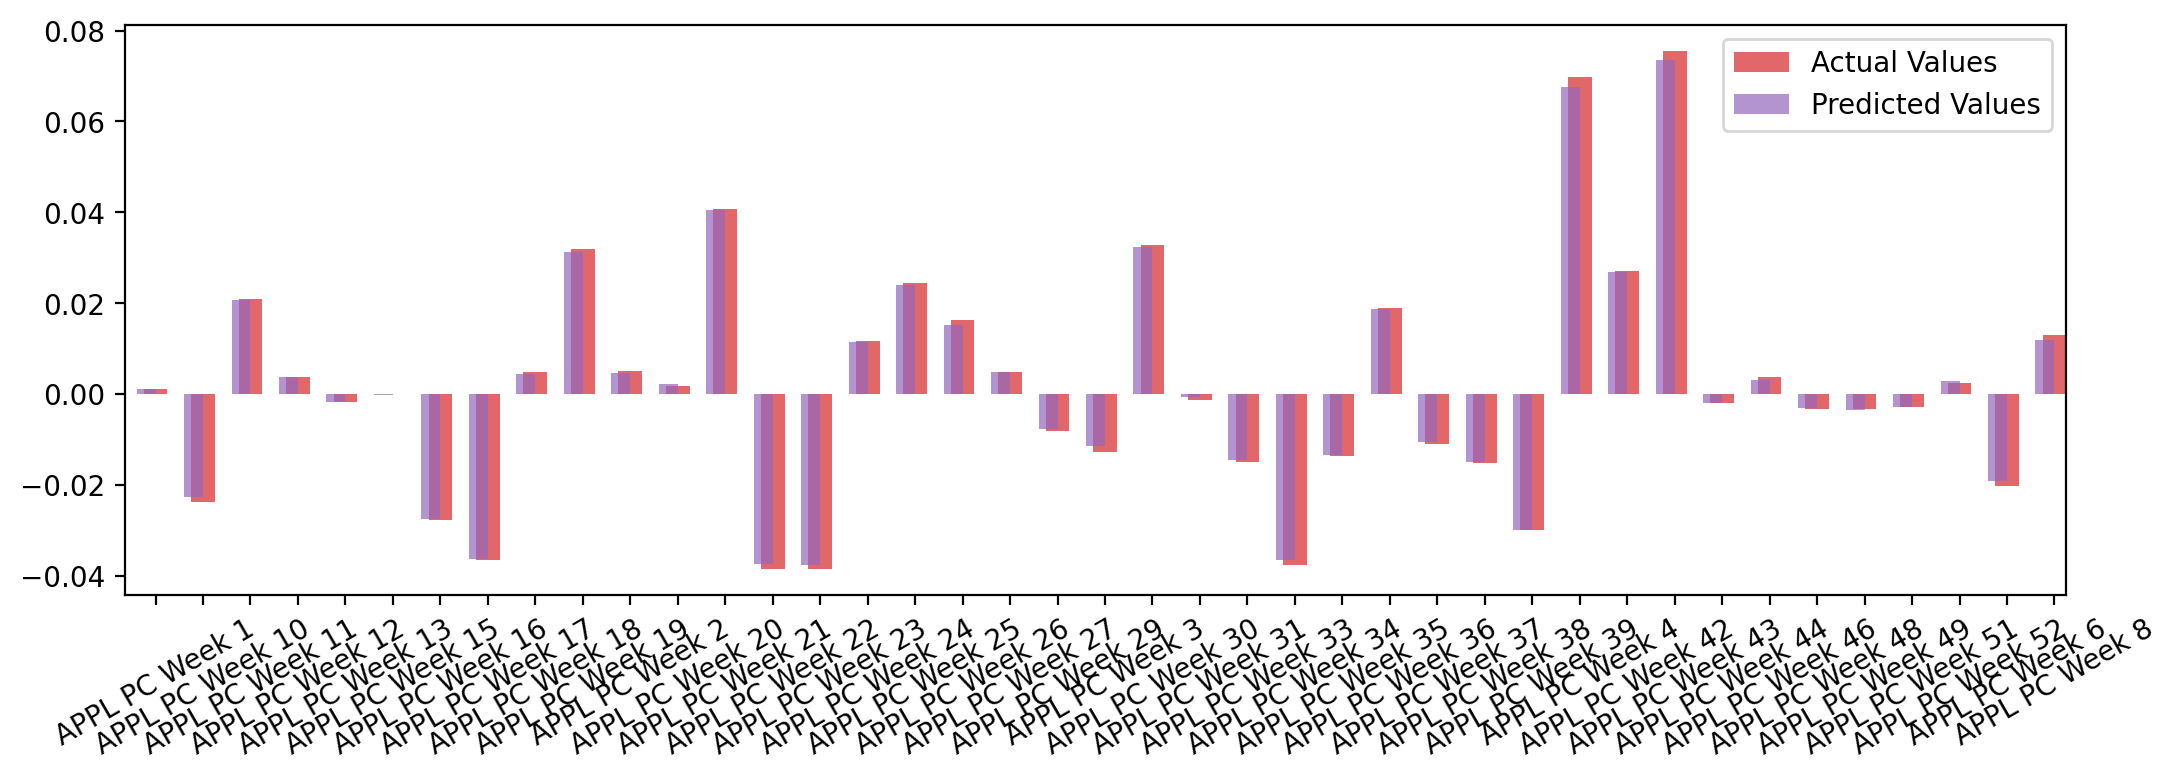

In [253]:
ax = y_train.plot(kind='bar', color='C3', alpha=0.7, label='Actual Values')

# Plot y_pred as bars, slightly offset for visibility
ax = y_pred.plot(kind='bar', color='C4', alpha=0.7, width=0.4, position=1, label='Predicted Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [254]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.005, 0.01, 0.05],
    'max_depth': [8, 10, 12, 15],
    'gamma': [0.001, 0.005, 0.01, 0.02],
    'random_state': [42]
}

# Create an XGBoost model with eval_metric
model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# Use GridSearchCV for hyperparameter tuning
clf = GridSearchCV(model, parameters, cv=5)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Print the best parameters and best score
print(f'Best params: {clf.best_params_}')
print(f'Best validation score = {clf.best_score_}')

Best params: {'gamma': 0.005, 'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 100, 'random_state': 42}
Best validation score = -0.17226154842168176


In [255]:
model = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',  # Set the evaluation metric here
    **clf.best_params_
)

eval_set = [(X_train, y_train), (X_test, y_test)]  # Adjust this based on your data

model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Optionally, you can also specify a custom evaluation metric for the test set
# model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric=["rmse", "mae"], verbose=False)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=0.005, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [256]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')

y_true = [-0.01190906  0.01145002  0.02142567 -0.03671873 -0.03224011]
y_pred = [0.0016161 0.0016161 0.0016161 0.0016161 0.0016161]


In [257]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 0.0004403473341905148


In [258]:
import numpy as np

# Assuming y_pred contains your percentage predictions
percentage_changes = np.array(y_pred)
multiplicative_factors = 1 + percentage_changes


In [259]:
# Assuming initial_price is the starting price of your time series
initial_price = 179.953888

predicted_prices = initial_price * np.cumprod(multiplicative_factors)


In [262]:
import numpy as np

# Assuming y_pred contains your percentage predictions
y_pred = (np.array([-0.00013778, 0.00167409, 0.00495364, -0.00013778, 0.00167409]) * 100)

# Convert percentage changes to multiplicative factors
multiplicative_factors = 1 + y_pred

# Assuming initial_price is the starting price of your time series
initial_price = 100  # Replace with your actual initial price

# Calculate predicted prices
predicted_prices = initial_price * np.cumprod(multiplicative_factors)

print(predicted_prices)

[ 98.6222     115.13244388 172.16491181 169.79282365 198.21767047]
